UnboundLocalError: cannot access local variable 'string' where it is not associated with a value

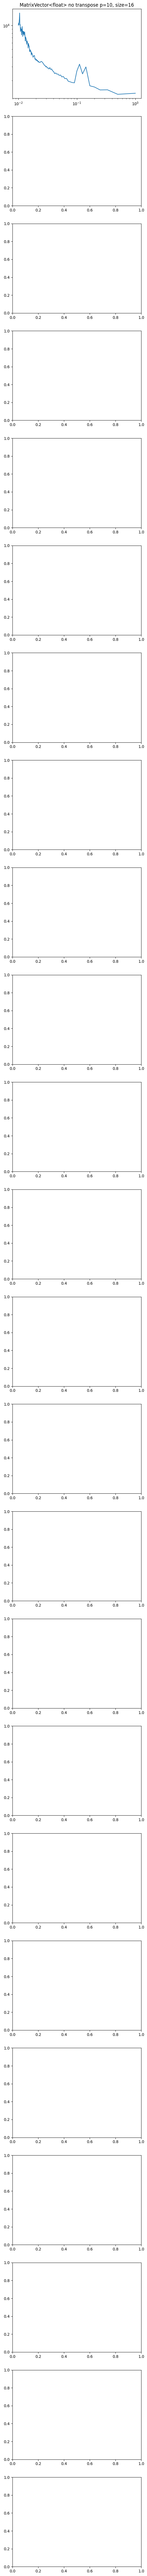

In [52]:
import pandas as pd

import json
from pathlib import Path
import os

import matplotlib.pyplot as plt
import itertools

def map_trans_to_string(i:int):
    match i:
        case 111:
            string="no transpose"
        case 112:
            string="transpose"
    return string

def map_order_to_string(i:int):
    match i:
        case 101:
            string="row major"
        case 102:
            string="col major"
    return string

blas_benchfile = Path(os.path.abspath(''))/ "build/blas_benchmark.json"

with open(blas_benchfile, "r") as f:
    data = json.load(f)
    
for b in data['benchmarks']:
    method = b['name'].split('/')[0]
    p=int(b['name'].split('/')[1])
    m=int(b['name'].split('/')[2])
    block_size=int(b['name'].split('/')[3])
    row_order=int(b['name'].split('/')[4])
    trans=int(b['name'].split('/')[5])
    b['method'] = method
    b['p'] = p
    b['p/m']= p/m
    b['block_size'] = block_size
    b['row_order']=row_order
    b['transpose']=trans
    
row_orders = [101,102]
    
filter_ps=[10, 500,1000]
filter_methods=["MatrixVector<float>","MatrixMatrix<float>"]
filter_block_sizes=[16,1024]
filter_transposes=[111,112]

fig, axs = plt.subplots(24,1 ,figsize=(6,120))

i=0
for filter_p, filter_method, filter_block_size, filter_transpose in itertools.product(filter_ps,filter_methods,filter_block_sizes,filter_transposes):
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")

    for row_order in row_orders:
        runtimes = pd.DataFrame(data["benchmarks"])
        runtimes_filter=runtimes[((runtimes["p"]==filter_p)&(runtimes["method"]==filter_method)&(runtimes["row_order"]==row_order)&(runtimes["transpose"]==filter_transpose)&(runtimes["block_size"]==filter_block_size))]

        x= runtimes_filter["p/m"]
        y= runtimes_filter["cpu_time"]

        axs[i].plot(x,y, label=map_order_to_string(row_order))
        
        axs[i].set_title(filter_method+" "+map_trans_to_string(filter_transpose)+" p="+str(filter_p)+", size="+str(filter_block_size))
    
    axs[i].legend(loc='upper right')
    i=i+1